<a href="https://colab.research.google.com/github/Darafarm/Darafarm/blob/main/Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip

--2024-08-24 14:32:32--  http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip
Resolving mrl.cs.vsb.cz (mrl.cs.vsb.cz)... 158.196.141.22
Connecting to mrl.cs.vsb.cz (mrl.cs.vsb.cz)|158.196.141.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341866898 (326M) [application/zip]
Saving to: ‘mrlEyes_2018_01.zip’

mrlEyes_2018_01.zip 100%[===================>] 326.03M  9.26MB/s    in 36s     

2024-08-24 14:33:11 (9.08 MB/s) - ‘mrlEyes_2018_01.zip’ saved [341866898/341866898]



In [2]:
!unzip mrlEyes_2018_01.zip

Streaming output truncated to the last 5000 lines.
 extracting: mrlEyes_2018_01/s0037/s0037_05259_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05260_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05261_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05262_1_1_0_0_1_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05263_1_1_0_0_1_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05264_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05265_1_1_0_0_1_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05266_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05267_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05268_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05269_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05270_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05271_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018_01/s0037/s0037_05272_1_1_0_0_0_01.png  
 extracting: mrlEyes_2018

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

def load_images_and_labels(main_path, target_shape=(224, 224), max_images=5000):
    X = []
    y = []
    images = []

    label_counts = {0: 0, 1: 0}  # Track the count of each label

    try:
        for folder in os.listdir(main_path):
            img_path = os.path.join(main_path, folder)
            if not os.path.isdir(img_path):
                print(f"Warning: Skipping {folder} as it is not a directory.")
                continue

            for image_file in os.listdir(img_path):
                label = os.path.splitext(image_file)[0].split('_')[4]  # Extract label from filename
                if label not in ['0', '1']:
                    print(f"Warning: Unknown label found in filename: {image_file}")
                    continue  # Skip images with unknown labels

                label = int(label)

                # Check if we've reached the max_images for this label
                if label_counts[label] >= max_images // 2:
                    continue

                y.append(label)
                label_counts[label] += 1

                image = cv2.imread(os.path.join(img_path, image_file), cv2.IMREAD_GRAYSCALE)
                image_resized = cv2.resize(image, target_shape)  # Resize image to a common shape
                X.append(image_resized)
                images.append(os.path.join(folder, image_file))

                # Stop if we've reached the total max_images across both classes to prevent having imbalance datasets
                if sum(label_counts.values()) >= max_images:
                    break

            if sum(label_counts.values()) >= max_images:
                break

    except Exception as e:
        print(f"Error occurred: {e}")

    # Convert lists to NumPy arrays for better performance
    X = np.array(X)
    y = np.array(y)

    # Shuffle the data
    X, y, images = shuffle(X, y, images, random_state=42)

    return X, y, images

# Example usage:
main_path = "/content/mrlEyes_2018_01"
X, y, images = load_images_and_labels(main_path)
print(f'Total images loaded:', len(X))
print(f'Total labels loaded:', len(y))
print(f'Total images files loaded:', len(images))

# Sample image file paths, image shapes, and labels
sample_images = images[0:10]
sample_shapes = [img.shape for img in X[0:10]]
sample_labels = y[0:10]

# Create a DataFrame
df = pd.DataFrame({
    'Image File': sample_images,
    'Image Shape': sample_shapes,
    'Label': sample_labels
})

# Display the DataFrame
print(df)







Total images loaded: 5000
Total labels loaded: 5000
Total images files loaded: 5000
                           Image File Image Shape  Label
0  s0025/s0025_01352_0_0_1_0_0_01.png  (224, 224)      1
1  s0017/s0017_00679_1_0_0_0_1_01.png  (224, 224)      0
2  s0017/s0017_00432_1_0_0_0_1_01.png  (224, 224)      0
3  s0025/s0025_01243_0_0_1_0_1_01.png  (224, 224)      1
4  s0025/s0025_00315_0_0_1_0_0_01.png  (224, 224)      1
5  s0025/s0025_01292_0_0_1_0_1_01.png  (224, 224)      1
6  s0025/s0025_00819_0_0_1_0_1_01.png  (224, 224)      1
7  s0017/s0017_01000_1_0_0_0_0_01.png  (224, 224)      0
8  s0017/s0017_01325_1_0_1_0_0_01.png  (224, 224)      1
9  s0017/s0017_00032_1_0_0_0_1_01.png  (224, 224)      0


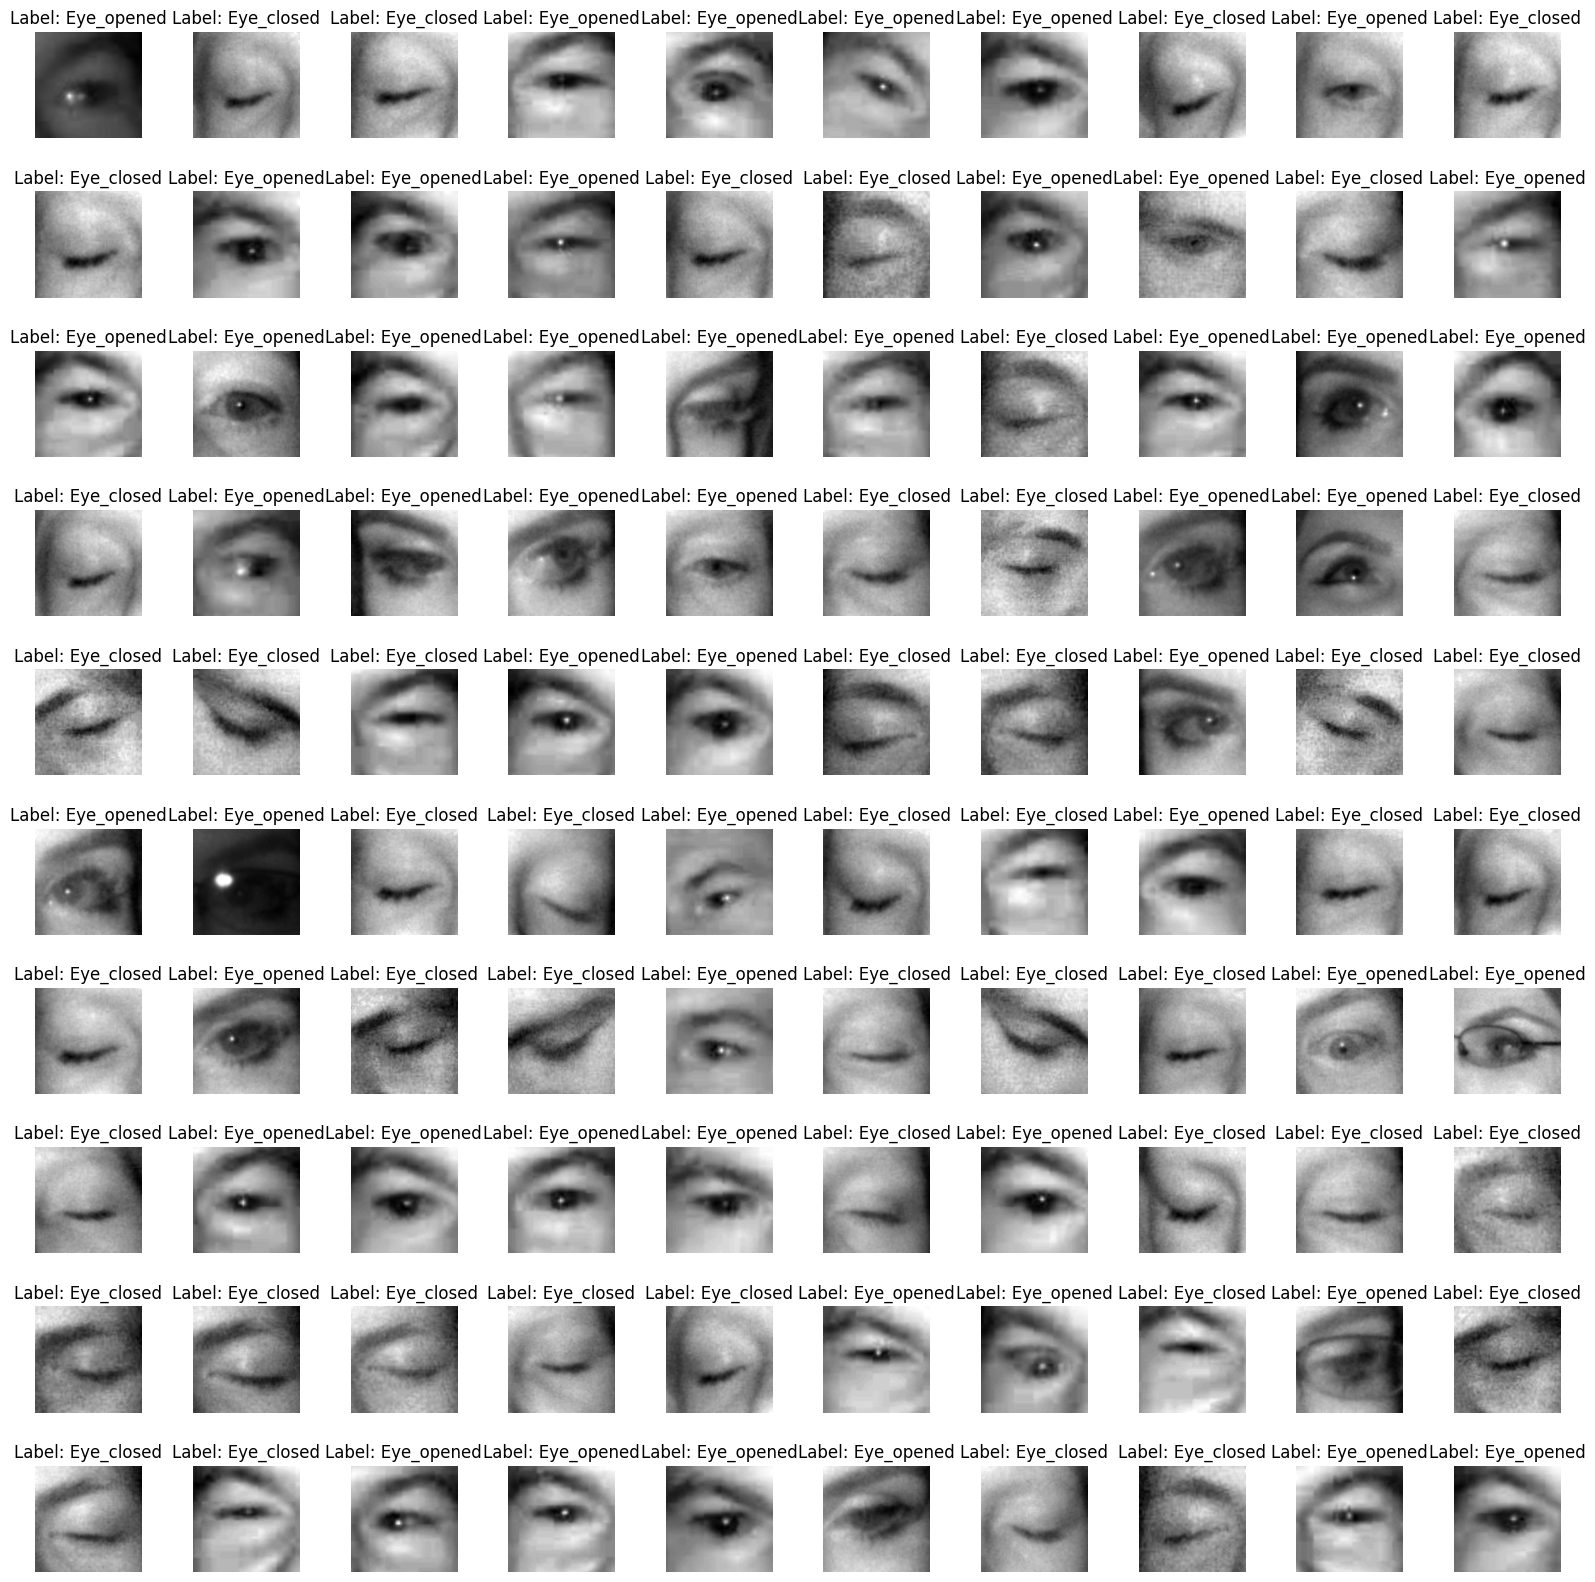

In [4]:
import matplotlib.pyplot as plt

def display_images(X, y, num_images=100, images_per_row=10):
    if len(X) == 0 or len(y) == 0:
        print("No images to display.")
        return

    num_images = min(num_images, len(X))
    num_rows = num_images // images_per_row + (1 if num_images % images_per_row else 0)
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(20, num_rows * 2))
    fig.subplots_adjust(hspace=0.5)

    for i in range(num_images):
        row = i // images_per_row
        col = i % images_per_row
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.imshow(X[i], cmap='gray')
        ax.set_title(f"Label: {'Eye_opened' if y[i] == 1 else 'Eye_closed'}")
        ax.axis('off')

    # Hide any unused subplots
    for j in range(num_images, num_rows * images_per_row):
        row = j // images_per_row
        col = j % images_per_row
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.axis('off')

    plt.show()


display_images(X, y, num_images=100)

In [5]:
print(len(X), len(y))

5000 5000


In [6]:
import numpy as np

# Function to shuffle X and y
def shuffle_data(X, y):
    # Convert X and y to numpy arrays if they are not already
    X = np.array(X)
    y = np.array(y)

    # Generate a permutation of indices
    indices = np.random.permutation(len(X))

    # Shuffle X and y with the generated indices
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    return X_shuffled, y_shuffled


X_shuffled, y_shuffled = shuffle_data(X, y)

# Display the first 10 shuffled samples to verify
for i in range(10):
    print(f'Shuffled image shape: {X_shuffled[i].shape}, Shuffled label: {y_shuffled[i]}')


import pandas as pd

# Create a Pandas DataFrame from the images and labels
df = pd.DataFrame({'image file': images, 'label': y})

# Display the DataFrame
print(df.head(15))


Shuffled image shape: (224, 224), Shuffled label: 1
Shuffled image shape: (224, 224), Shuffled label: 0
Shuffled image shape: (224, 224), Shuffled label: 0
Shuffled image shape: (224, 224), Shuffled label: 0
Shuffled image shape: (224, 224), Shuffled label: 0
Shuffled image shape: (224, 224), Shuffled label: 1
Shuffled image shape: (224, 224), Shuffled label: 1
Shuffled image shape: (224, 224), Shuffled label: 1
Shuffled image shape: (224, 224), Shuffled label: 0
Shuffled image shape: (224, 224), Shuffled label: 1
                            image file  label
0   s0025/s0025_01352_0_0_1_0_0_01.png      1
1   s0017/s0017_00679_1_0_0_0_1_01.png      0
2   s0017/s0017_00432_1_0_0_0_1_01.png      0
3   s0025/s0025_01243_0_0_1_0_1_01.png      1
4   s0025/s0025_00315_0_0_1_0_0_01.png      1
5   s0025/s0025_01292_0_0_1_0_1_01.png      1
6   s0025/s0025_00819_0_0_1_0_1_01.png      1
7   s0017/s0017_01000_1_0_0_0_0_01.png      0
8   s0017/s0017_01325_1_0_1_0_0_01.png      1
9   s0017/s0017_0003

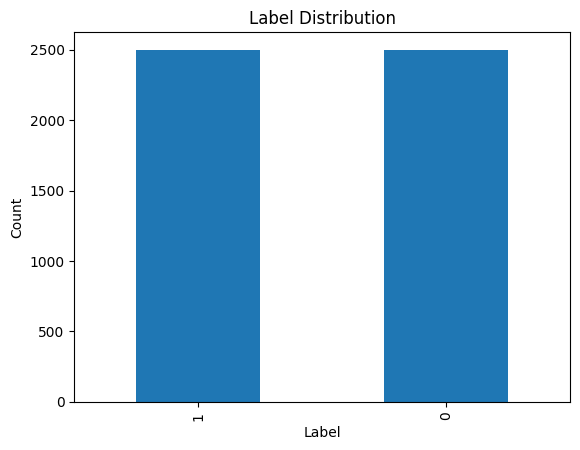

In [7]:

# Create a bar chart of the label distribution
df['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()





In [8]:
df.label.value_counts()

,count
label,
1,2500
0,2500


In [9]:
X.shape

(5000, 224, 224)

In [10]:


# Normalize the pixel values in X_10k
X_5k_normalized = X / 255.0

# Print the minimum and maximum values of the normalized data
print(f"Minimum value in X_5k_normalized: {np.min(X_5k_normalized)}")
print(f"Maximum value in X_5k_normalized: {np.max(X_5k_normalized)}")


Minimum value in X_5k_normalized: 0.07450980392156863
Maximum value in X_5k_normalized: 1.0


In [11]:
!pip install tensorflow

In [ ]:
X.shape

(5000, 224, 224)

# **MODEL BUILDING USING SIMPLE CONVOLUTION NEURAL NETWORK WITH FEW LAYERS**

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, Multiply
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

In [13]:
# Data Splitting
# Assuming X and y are already loaded and preprocessed
X = np.expand_dims(X, axis=-1)  # Expand dimensions for grayscale images

# Normalize pixel values to the range [0, 1]
X = X.astype('float32') / 255.0

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print shapes to verify
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (3500, 224, 224, 1), (3500,)
Validation set: (750, 224, 224, 1), (750,)
Test set: (750, 224, 224, 1), (750,)


In [14]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:
# Attention Mechanism
def attention_block(inputs):
    attention = Conv2D(32, kernel_size=1, padding='same', activation='relu')(inputs)
    attention = Conv2D(1, kernel_size=1, padding='same', activation='sigmoid')(attention)
    attention = Multiply()([inputs, attention])
    return attention


In [16]:
# Building a simple CNN model with attention
input_layer = Input(shape=(224, 224, 1))

x = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = attention_block(x)

x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = attention_block(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output_layer = Dense(1, activation='sigmoid')(x)

model = Model(inputs=input_layer, outputs=output_layer)

In [19]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 224, 224, 32)   │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 112, 112, 32)   │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 112, 112, 32)   │          1,056 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 112, 112, 1)    │             33 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 112, 112, 32)   │              0 │ max_pooling2d[0][0],   │
│                           │                        │                │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 112, 112, 64)   │         18,496 │ multiply[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 56, 56, 64)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 56, 56, 32)     │          2,080 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 56, 56, 1)      │             33 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_1 (Multiply)     │ (None, 56, 56, 64)     │              0 │ max_pooling2d_1[0][0], │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 200704)         │              0 │ multiply_1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │     25,690,240 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │            129 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 25,712,387 (98.08 MB)

 Trainable params: 25,712,387 (98.08 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with augmented data
train_generator = datagen.flow(X_train, y_train, batch_size=32)
val_generator = datagen.flow(X_val, y_val, batch_size=32)

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=50,
                    callbacks=[early_stopping])

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


110/110 ━━━━━━━━━━━━━━━━━━━━ 34s 215ms/step - accuracy: 0.5152 - loss: 0.6918 - val_accuracy: 0.6480 - val_loss: 0.6511
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.7215 - loss: 0.6025 - val_accuracy: 0.8133 - val_loss: 0.4356
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.7990 - loss: 0.4637 - val_accuracy: 0.8267 - val_loss: 0.3961
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - accuracy: 0.8265 - loss: 0.4057 - val_accuracy: 0.8160 - val_loss: 0.4154
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 20s 152ms/step - accuracy: 0.8328 - loss: 0.4099 - val_accuracy: 0.8547 - val_loss: 0.3587
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 18s 153ms/step - accuracy: 0.8475 - loss: 0.3848 - val_accuracy: 0.8587 - val_loss: 0.3293
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 22s 165ms/step - accuracy: 0.8507 - loss: 0.3915 - val_accuracy: 0.8640 - val_loss: 0.3374
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 19s 151ms/step - accuracy: 0.8585 - loss: 0.3742 - val

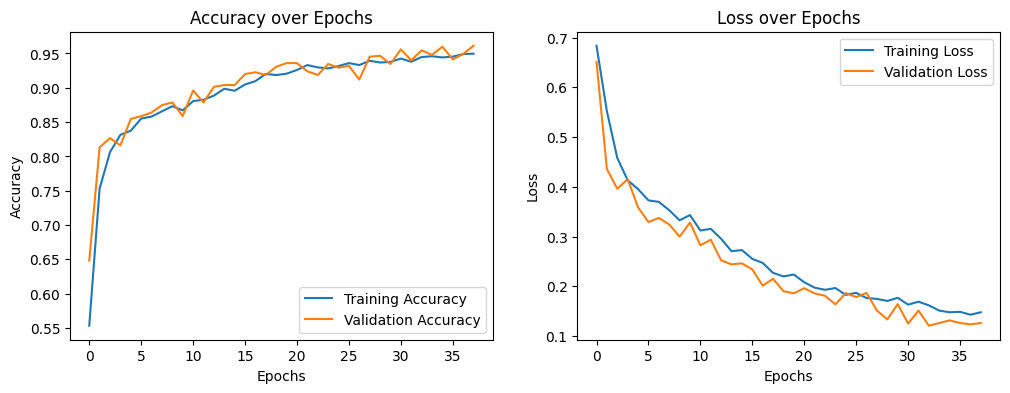

In [21]:
import matplotlib.pyplot as plt


# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Predict the labels for the test set
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.4f}")



# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:")
print(report)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Test accuracy: 0.9667
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.94      0.97       386
     Class 1       0.94      1.00      0.97       364

    accuracy                           0.97       750
   macro avg       0.97      0.97      0.97       750
weighted avg       0.97      0.97      0.97       750



24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


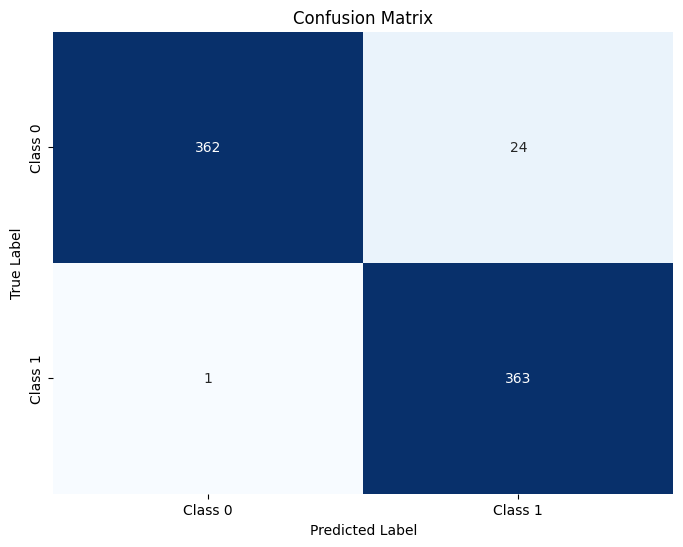

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict the labels for the test set
y_pred_prob = model.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


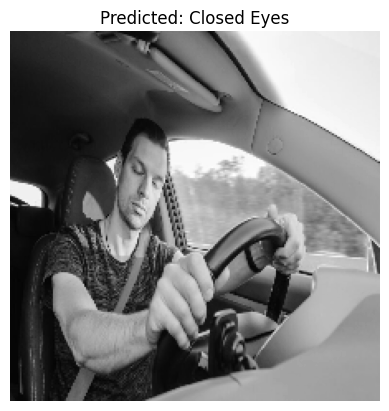

In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Function to preprocess and predict on a single image
def predict_and_display(model, image_path, target_size=(224, 224)):
    # Load the image in grayscale mode
    img = load_img(image_path, target_size=target_size, color_mode='grayscale')

    # Convert the image to array
    img_array = img_to_array(img)

    # Normalize the image (assuming the training data was normalized to [0, 1])
    img_array = img_array / 255.0

    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)

    # Make predictions
    predictions = model.predict(img_array)

    # For binary classification, we assume 1 means open eyes, 0 means closed eyes
    if predictions[0] > 0.5:
        predicted_class = "Open Eyes"
    else:
        predicted_class = "Closed Eyes"

    # Display the image with the prediction
    plt.imshow(img_array[0].squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')  # Hide axes
    plt.show()

# Path to the unseen image
image_path = '/content/drowsy-driver-1024x683.jpg'

# Predict and display the result
predict_and_display(model, image_path)